## Multiple Linear Regression

### Step01: Goal- Robot's linear velocity prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('imu_robot_motion.csv')
df.head()

,lin_acc_x,lin_acc_y,ang_vel_z,robot_linear_velocity
0,0.10,0.01,0.01,0.43
1,0.13,0.06,0.02,0.44
2,0.13,0.03,0.03,0.37
3,0.14,NaN,0.02,0.48
4,0.17,0.04,0.01,0.49


In [3]:
df.describe()

,lin_acc_x,lin_acc_y,ang_vel_z,robot_linear_velocity
count,96.000000,89.000000,90.000000,96.000000
mean,1.047083,0.508202,0.166556,1.361458
std,0.561031,0.278513,0.093041,0.557472
min,0.100000,0.010000,0.010000,0.370000
25%,0.570000,0.290000,0.090000,0.882500
50%,1.045000,0.510000,0.155000,1.365000
75%,1.515000,0.750000,0.237500,1.837500
max,2.010000,0.990000,0.340000,2.310000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

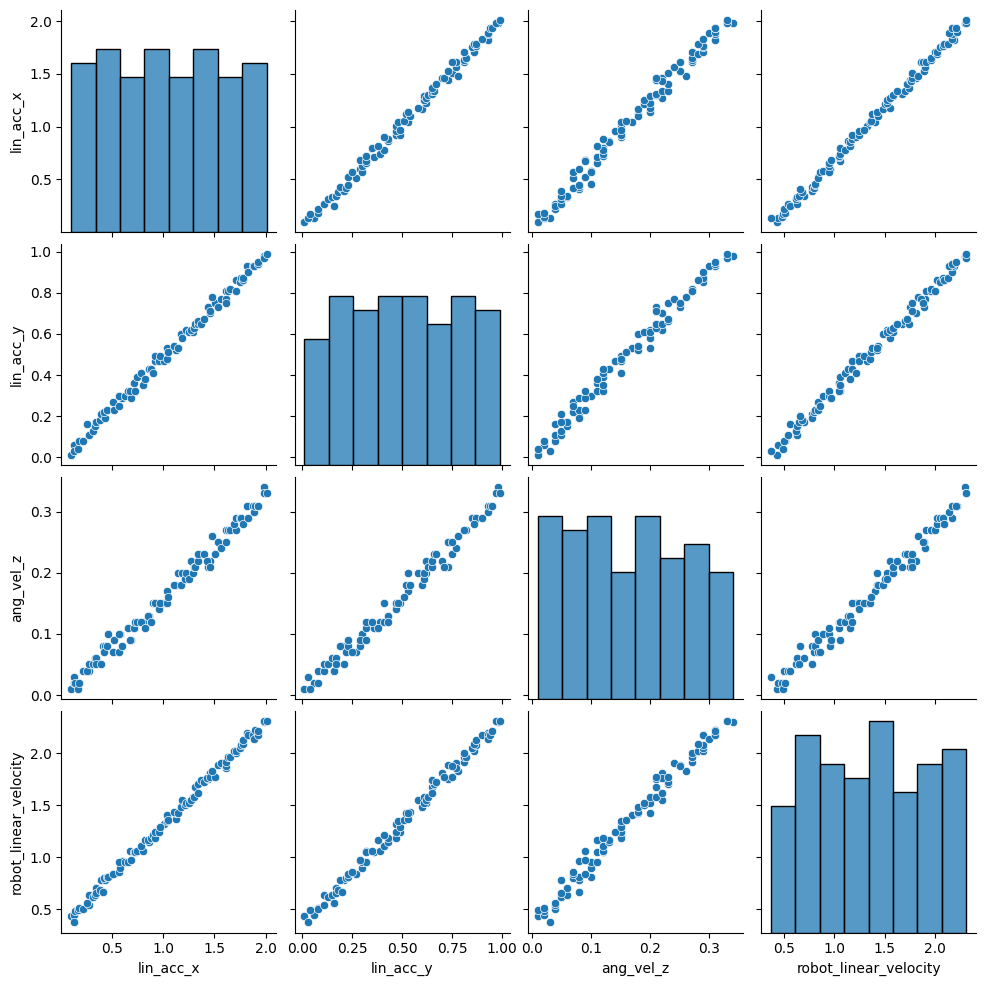

In [5]:
sns.pairplot(df)

- 1.2 : Missing Value

In [7]:
df.isna().sum()

lin_acc_x                0
lin_acc_y                7
ang_vel_z                6
robot_linear_velocity    0
dtype: int64

<Axes: xlabel='lin_acc_y', ylabel='Count'>

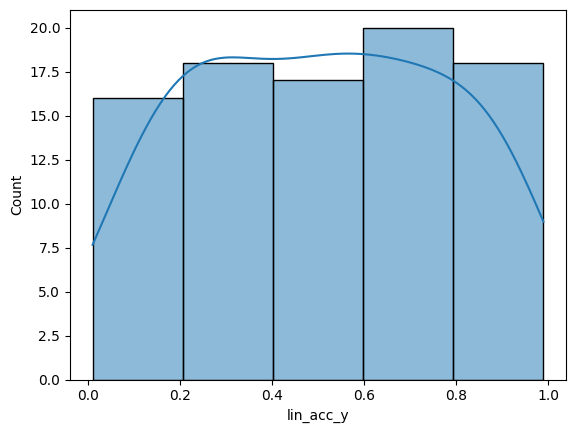

In [15]:
sns.histplot(df['lin_acc_y'],bins= 5,kde=True)

<Axes: xlabel='ang_vel_z', ylabel='Count'>

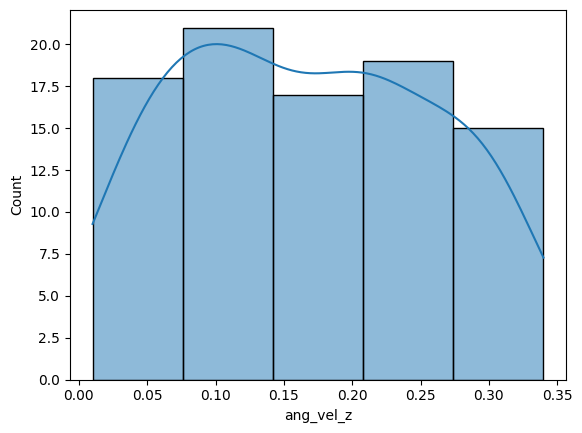

In [16]:
sns.histplot(df['ang_vel_z'],bins= 5,kde=True)

In [17]:
df['lin_acc_y'] = df['lin_acc_y'].fillna(round(df['lin_acc_y'].mean(),2))  

df['ang_vel_z'] = df['ang_vel_z'].fillna(round(df['ang_vel_z'].mean(),2))

In [18]:
df.isna().sum()

lin_acc_x                0
lin_acc_y                0
ang_vel_z                0
robot_linear_velocity    0
dtype: int64

## Step03: Feature Selection

In [19]:
X = df[['lin_acc_x','lin_acc_y','ang_vel_z']] 
y = df['robot_linear_velocity'] 

In [23]:
X.head()

,lin_acc_x,lin_acc_y,ang_vel_z
0,0.10,0.01,0.01
1,0.13,0.06,0.02
2,0.13,0.03,0.03
3,0.14,0.51,0.02
4,0.17,0.04,0.01


In [21]:
y.head()

0    0.43
1    0.44
2    0.37
3    0.48
4    0.49
Name: robot_linear_velocity, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step05: Model Training 

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [28]:
model.coef_

array([0.93245892, 0.05175008, 0.24103996])

In [29]:
model.intercept_

np.float64(0.3119304740694617)

## Step05.1: Model Evaluation

In [30]:
y_pred = model.predict(X_test)

In [35]:
X_test.values

array([[1.69, 0.51, 0.28],
       [1.63, 0.81, 0.27],
       [1.56, 0.77, 0.24],
       [1.98, 0.97, 0.33],
       [0.74, 0.39, 0.12],
       [1.71, 0.81, 0.27],
       [1.46, 0.71, 0.21],
       [0.92, 0.49, 0.15],
       [0.1 , 0.01, 0.01],
       [0.31, 0.13, 0.05],
       [1.37, 0.65, 0.17],
       [0.67, 0.32, 0.09],
       [0.42, 0.22, 0.07],
       [0.17, 0.04, 0.01],
       [0.71, 0.36, 0.11],
       [0.57, 0.3 , 0.1 ],
       [0.34, 0.17, 0.06],
       [0.51, 0.27, 0.07],
       [1.17, 0.6 , 0.18],
       [1.78, 0.87, 0.17]])

In [32]:
y_pred

array([1.98166978, 1.93883687, 1.86426354, 2.2879399 , 1.0510574 ,
       2.01343358, 1.76068144, 1.23130621, 0.40810427, 0.61977225,
       1.66401354, 0.97493157, 0.73182103, 0.47492889, 1.01912073,
       0.88306108, 0.65222642, 0.81832984, 1.47734465, 2.05770671])

In [34]:
y_test.values

array([2.02, 1.96, 1.9 , 2.31, 1.06, 2.  , 1.77, 1.24, 0.43, 0.62, 1.74,
       1.06, 0.8 , 0.49, 1.05, 0.95, 0.7 , 0.84, 1.48, 2.13])

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(y_test, y_pred) 
mse

0.0017944434996973394

In [38]:
rmse = np.sqrt(mse)
rmse

np.float64(0.04236087227262134)

In [39]:
from sklearn.metrics import r2_score 

r2_score = r2_score(y_test, y_pred)
r2_score

0.9948328439338793